# Vérification de la conduction thermique stationnaire avec conductivité thermique variable :  conductivité thermique linéaire

In [1]:
from trustutils import run 

run.introduction('D. Jamet','26/05/2021')

## Introduction 
 Validation made by : D. Jamet



 Report created : 26/05/2021



 Report generated 25/01/2022

### Description

On  considère  un  problème  de  conduction  thermique  stationnaire  unidimensionnel  dans  la  direction $x$.La  conductivité  thermique  est  une  fonction  variant  linéairement  suivant  la  direction $x$.  Une  solution analytique à ce problème existe et elle est comparée à la solution calculée avec GENEPI. La température est imposée en entrée et sortie du domaine (cf.  jeu de données).  On compare le profil de température dans la directionxainsi que le champ de température bidimensionnel.  On compare également les flux conductifs sur les parois en entrée et sortie.

In [2]:
run.TRUST_parameters()

### TRUST parameters 
 * Version TRUST: 1.8.4
 * Binary used: /volatile/catA/ll258196/trust-code/exec/TRUST_mpi_opt (built on TRUST /volatile/catA/ll258196/trust-code/Validation/Rapports_automatiques/jupyter/EF/EF_Conduc_k_var_1/build)

In [3]:
from trustutils import run 
import os
c1 = run.addCase(".","conduc_genepi_k_var_1.data",nbProcs=1)
run.printCases()
run.runCases()

### Test cases 
* ./conduc_genepi_k_var_1.data : 


Running **with Sserver**...
  => A total of 1 cases were (successfully) run in 1.2s.


## Champs de temp ́erature
On compare les champs de température calculé par GENEPI et analytique.  Cette comparaison se fait sur un profil en $y=cte$ et sur le champ 2D.
### Comparaison des profils calcul ́e et analytique

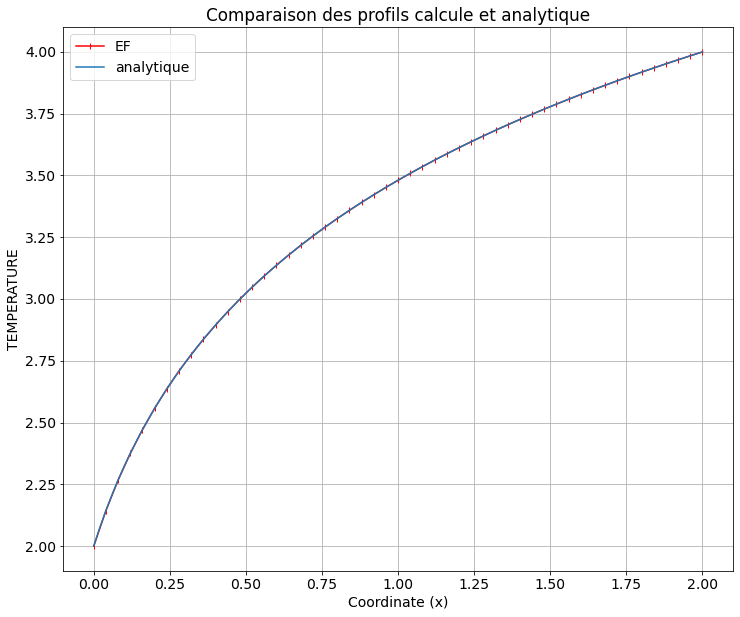

In [4]:
from trustutils.jupyter import plot
import numpy as np

Graphique=plot.Graph("Comparaison des profils calcule et analytique")
Graphique.addSegment("./conduc_genepi_k_var_1_TEMPERATURE_X.son",param="Time",marker="-|",value=9.96110801e+00,color="r",label="EF")
x=np.linspace(0,2,100)
y=2.+(4.-2.)/np.log((0.25+1.125*2.)/0.25)*np.log((0.25+1.125*x)/0.25)
Graphique.add(x,y,label="analytique")
Graphique.visu()

### Comparaison des champs 2D calculé et analytique 

On trace le champ d’écart entre la temp ́erature calculée et la solution analytique.  La solution analytiqueest représentée par des isovaleurs du champ de température.

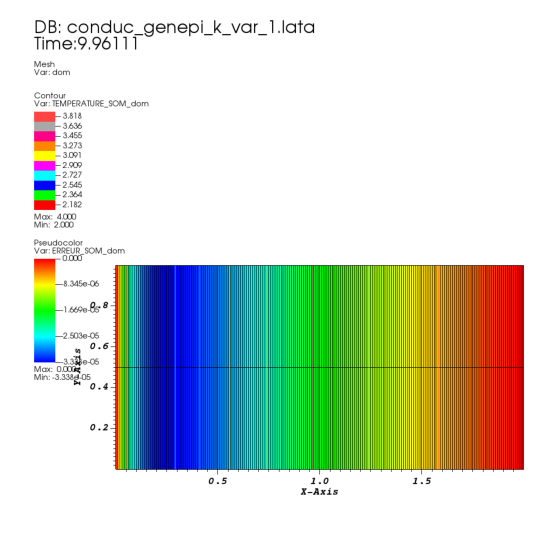

In [5]:
from trustutils import visitutils as visit
plot=visit.Show("./conduc_genepi_k_var_1.lata","Contour","TEMPERATURE_SOM_dom")
plot.visitCommand("DefineScalarExpression(\"ERREUR_SOM_dom\",\"TEMPERATURE_SOM_dom-(2.+(4.-2.)/log((0.25+1.125*2.)/0.25)*log((0.25+1.125*(coord(dom)[0]))/0.25))\")")
plot.addField("./conduc_genepi_k_var_1.lata","Pseudocolor","ERREUR_SOM_dom") 
plot.plot()

## Flux conductifs aux frontières du domaine

Les flux conductifs calcul ́es par GENEPI en $x= 0$ et $x=L$ sont comparés aux flux théoriques.  L’erreur correspondante est  également donnée.

### Comparaison théorie/numérique

In [6]:
from trustutils.jupyter import plot
import numpy as np

table=plot.Table(["flux gauche","flux droit"])
ref=[-0.9772,0.9772]
table.addLigne([ref],"theorie")
data=plot.loadText("./conduc_genepi_k_var_1_fin.out")
table.addLigne([data[[1,4]]],"calcul")
error=[int((ref[0]-data[1])*10000)/(100.*ref[0]),int((ref[1]-data[4])*10000)/(100*ref[1])]
table.addLigne([error],"erreur en %")
table.df 

,flux gauche,flux droit
theorie,-0.977200,0.977200
calcul,-0.977198,0.977198
erreur en %,-0.000000,0.000000


## Data Files
### conduc_genepi_k_var_1

In [7]:
from trustutils import run

run.dumpDataset("./conduc_genepi_k_var_1.data")

 # Conduction 2D #
 # Temperature imposee en entree et en sortie #
 # Paroi du haut adiabatique et paroi du bas symetrie #
 
 # PARALLEL OK 8 #
 dimension 2
 
 Pb_conduction pb
 Domaine dom
 # BEGIN MESH #
 Mailler dom
 {
 	 Pave Cavite 
  	 {
 	 	 Origine 0. 0.
 	 	 Nombre_de_Noeuds 201 3 
 	 	 Longueurs 2. 1.
 	 }
 	 {
 	 	 Bord Gauche X = 0. 0. <= Y <= 1.
 	 	 Bord Haut   Y = 1. 0. <= X <= 2.
 	 	 Bord Bas    Y = 0. 0. <= X <= 2.
 	 	 Bord Droit  X = 2. 0. <= Y <= 1.
 	 }
 } 
 
 
 # END MESH #
 # BEGIN PARTITION
 Partition dom
 {
 	 Partition_tool tranche { tranches 2 1 }
 	 Larg_joint 1
 	 zones_name DOM
 }
 End
 END PARTITION #
 
 # BEGIN SCATTER
 Scatter DOM.Zones dom
 END SCATTER #
 
 EF dis
 
 Scheme_euler_implicit sch
 Read sch
 {
 	 tinit 0
 	 tmax 300.
 	 dt_min 0.00001
 	 dt_impr 0.00001
 	 dt_sauv 100
 	 seuil_statio 1.e-8
 solveur piso { seuil_convergence_solveur 1e-8 } 
 facsec 1e2
 }
 #
 champ_fonc_xyz ll Read ll dom 1 1+1.125*x
 ecrire_champ_med dom ll ll.med
 	 lambda